# Dataset overview and first-prio instances

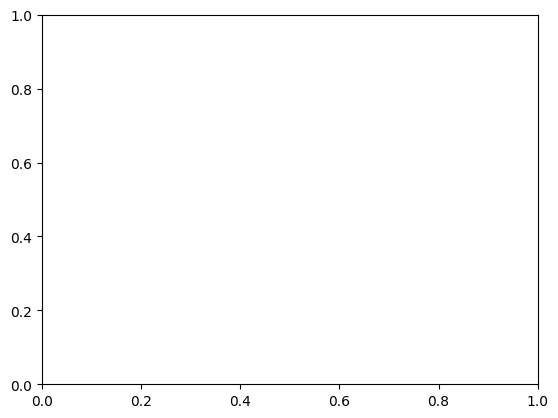

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random
from glob import glob
import re
import os
import json
import numpy as np

from math import ceil

from importlib import reload

from qubo_utils import load_QUBO, solve_QUBO
import MIS_inst as MIS
import TSP_inst as TSP
import MWC_inst as MWC
reload(MWC); reload(MIS); reload(TSP)
from time import time

## MIS instances

Let's select three instances to start with. Here's a general code to experiment with / visualize different instances:two

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-11


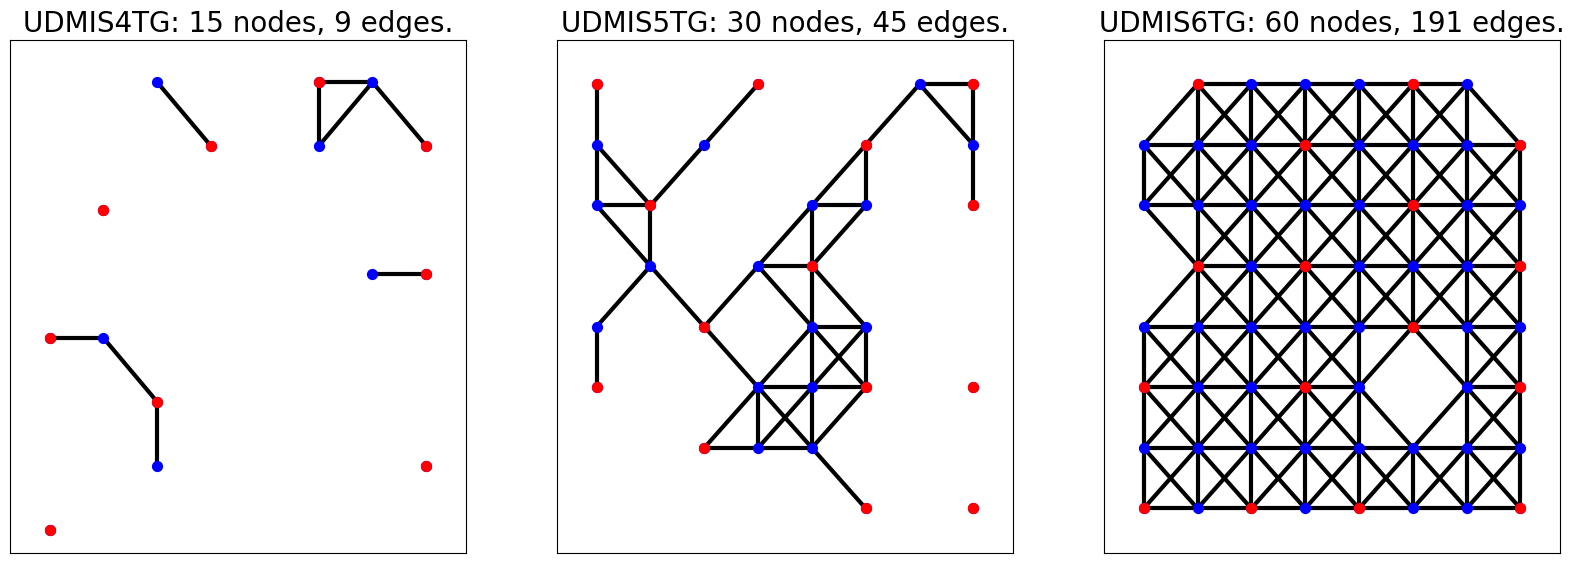

In [2]:
MIS.draw_inst_grid(['./instances/QUBO/UDMIS4TG_15_N15_W1.0_R0.2.qubo.json',
                    './instances/QUBO/UDMIS5TG_30_N30_W1.0_R0.2.qubo.json',
                    './instances/QUBO/UDMIS6TG_60_N60_W1.0_R0.2.qubo.json'])

In [3]:
files=[fname for fname in sorted(glob("./instances/QUBO/UDMIS*TG_*.json"))]
files

['./instances/QUBO/UDMIS1TG_8_N8_W1.0_R0.3.qubo.json',
 './instances/QUBO/UDMIS2TG_15_N15_W1.0_R0.3.qubo.json',
 './instances/QUBO/UDMIS3TG_25_N25_W1.0_R0.3.qubo.json',
 './instances/QUBO/UDMIS4TG_15_N15_W1.0_R0.2.qubo.json',
 './instances/QUBO/UDMIS5TG_30_N30_W1.0_R0.2.qubo.json',
 './instances/QUBO/UDMIS6TG_60_N60_W1.0_R0.2.qubo.json',
 './instances/QUBO/UDMIS7TG_30_N30_W1.0_R0.1.qubo.json',
 './instances/QUBO/UDMIS8TG_80_N80_W1.0_R0.1.qubo.json',
 './instances/QUBO/UDMIS9TG_150_N150_W1.0_R0.1.qubo.json']

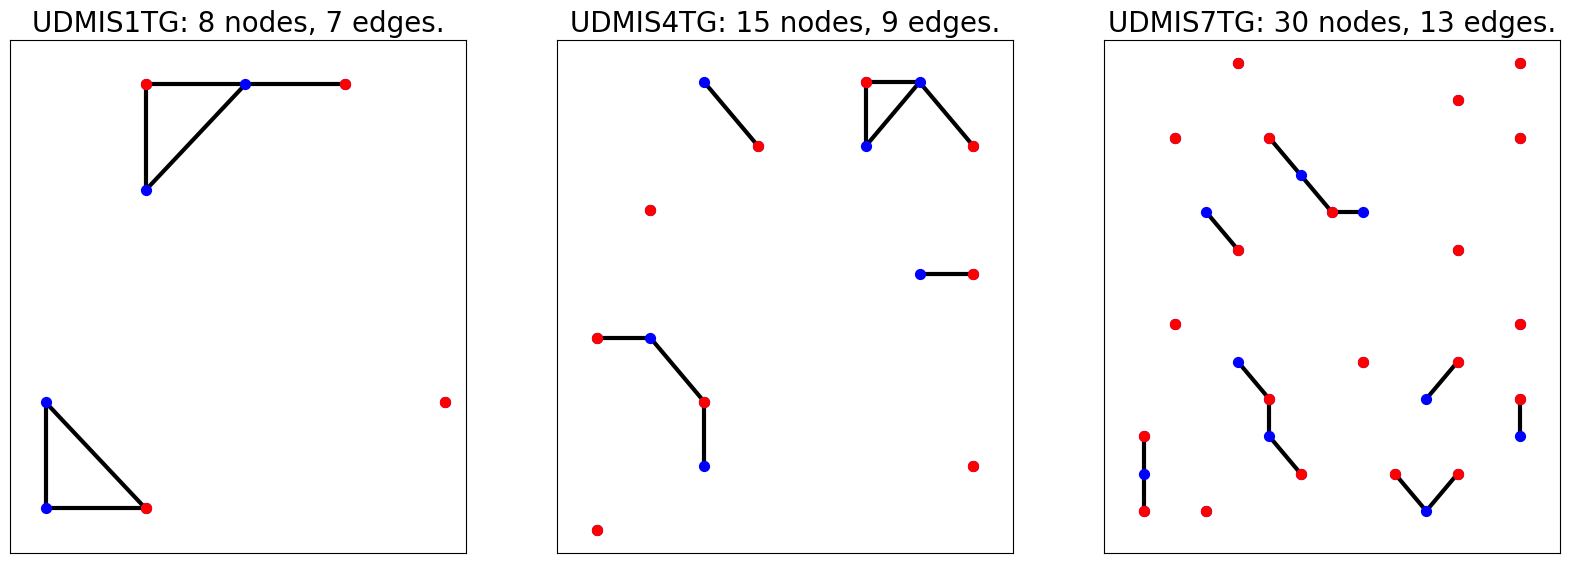

In [4]:
MIS.draw_inst_grid(['./instances/QUBO/UDMIS1TG_8_N8_W1.0_R0.3.qubo.json',
                    './instances/QUBO/UDMIS4TG_15_N15_W1.0_R0.2.qubo.json',
                    './instances/QUBO/UDMIS7TG_30_N30_W1.0_R0.1.qubo.json'])

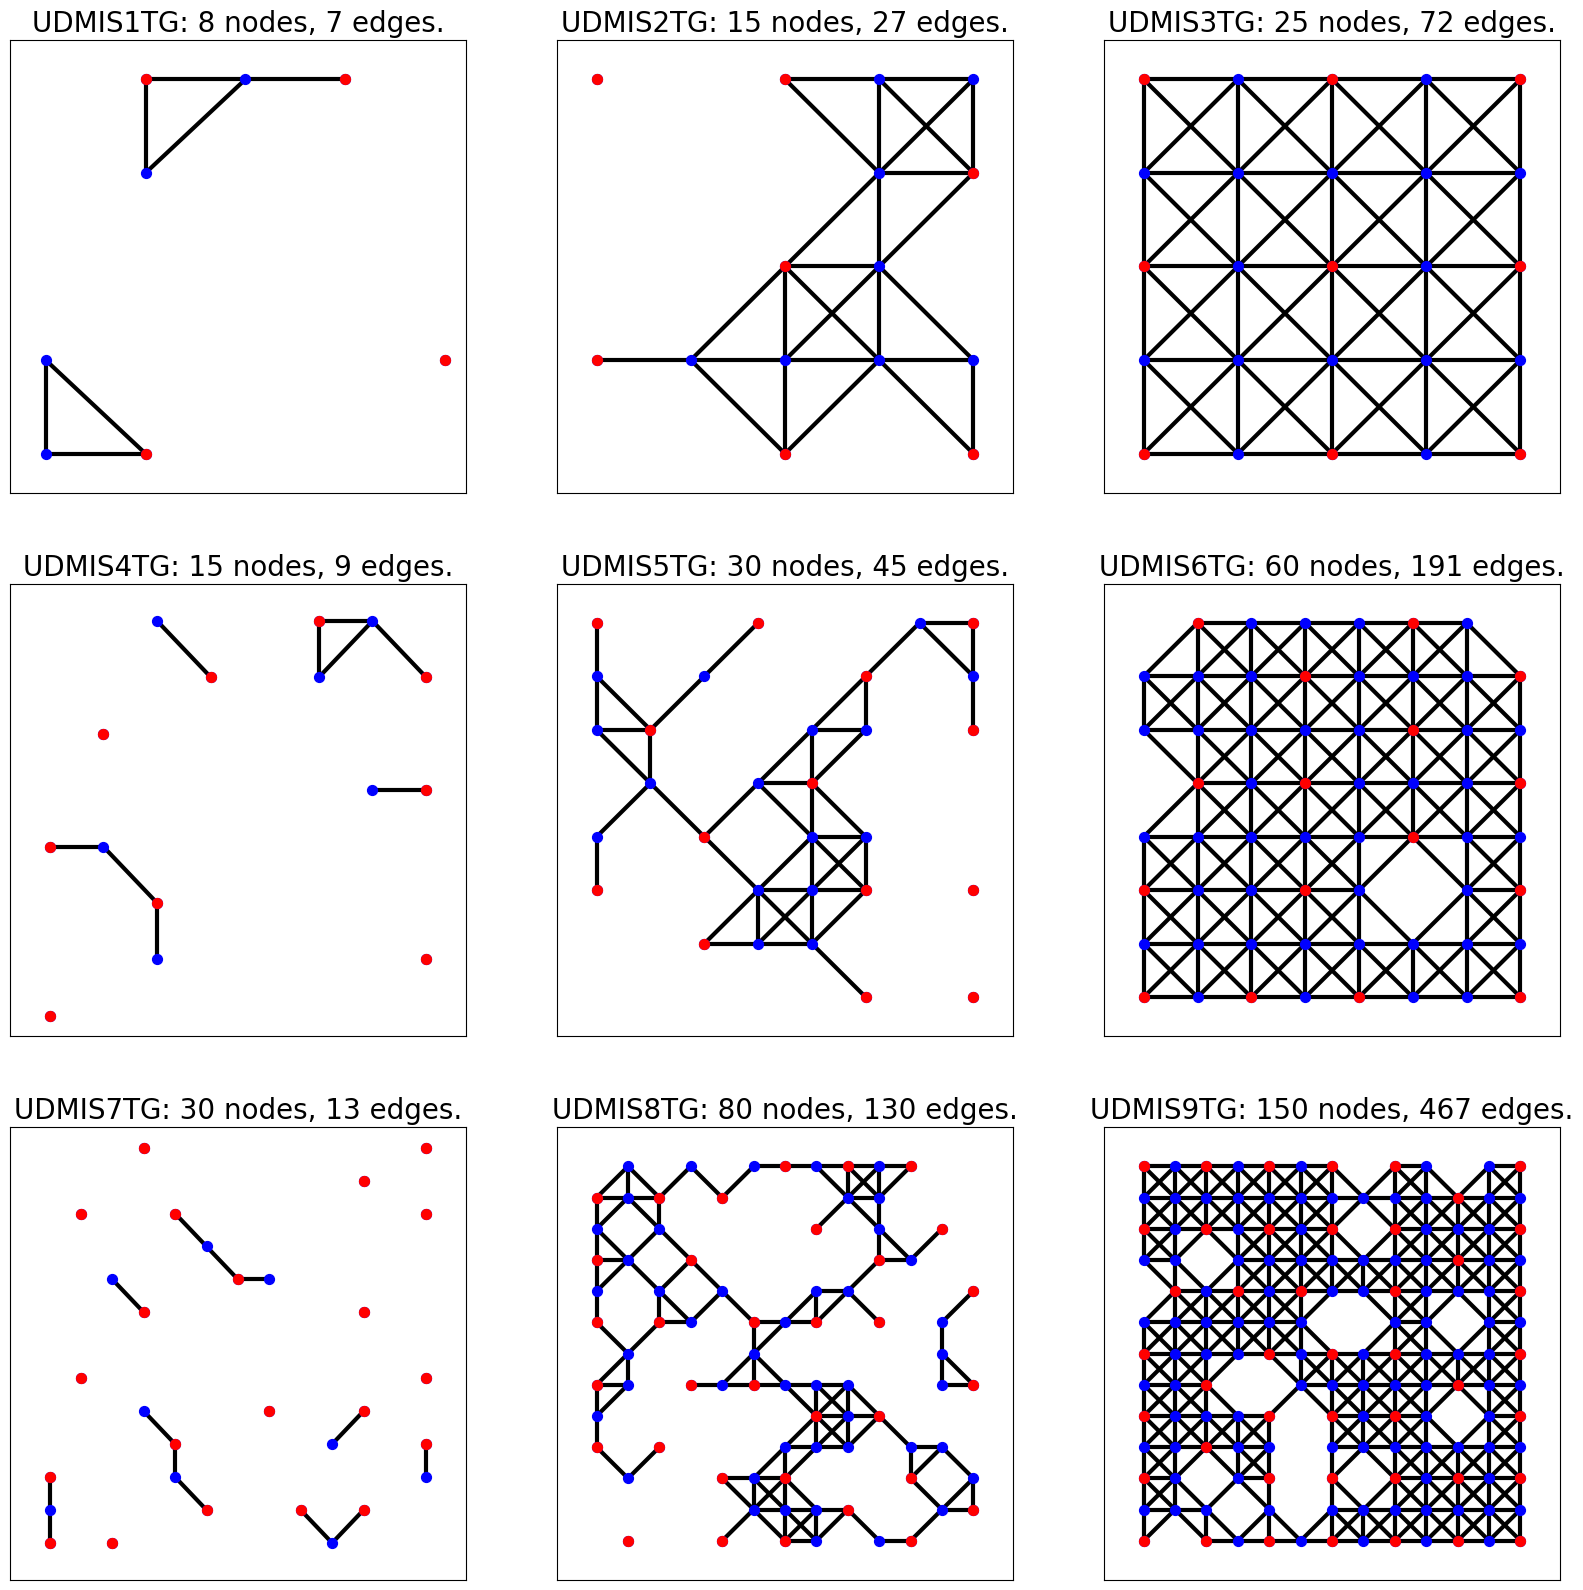

In [5]:
MIS.draw_inst_grid(files)

In [6]:
help(load_QUBO)

Help on function load_QUBO in module qubo_utils:

load_QUBO(filename)
    Loads a QUBO from `filename`.
    
    Returns:
        Q (np.array), P (np.array), Const (float), js(dict): problem
        parameters (Q, P, Const) along with the original JSON dictionary.



In [7]:
# Let us cross-check this
ofiles=[fname for fname in sorted(glob("./instances/orig/UDMIS*TG_*.json"))]
ofiles

blockade_radius = 8.044e-06

for ofile in ofiles:
    with open(ofile, 'r') as infile:
        instance_data = json.load(infile)
        
    x_min = np.min([x for x,y in instance_data['description']['points'].values()])
    y_min = np.min([y for x,y in instance_data['description']['points'].values()])
    R = instance_data['description']['R']

    factor = blockade_radius / R

    data = np.zeros((len(instance_data['nodes']),2))
    for i,(x,y) in instance_data['description']['points'].items():
        data[int(i)-1,0] = (x-x_min)*factor
        data[int(i)-1,1] = (y-y_min)*factor
    
    min_dist = np.min([np.linalg.norm(data[i] - data[j]) for i in range(len(data))
                        for j in range(len(data))
                        if i!=j])
    print(f"Min distance: {min_dist} (check: {min_dist > 4e-06})")
    
    max_coord = np.max(data)
    print(f"Max coord is: {max_coord} (check: {max_coord < 7.5e-05})")

Min distance: 5.362666666666665e-06 (check: True)
Max coord is: 2.1450666666666664e-05 (check: True)
Min distance: 5.362666666666665e-06 (check: True)
Max coord is: 2.1450666666666664e-05 (check: True)
Min distance: 5.362666666666665e-06 (check: True)
Max coord is: 2.1450666666666664e-05 (check: True)
Min distance: 5.362666666666662e-06 (check: True)
Max coord is: 3.753866666666666e-05 (check: True)
Min distance: 5.362666666666662e-06 (check: True)
Max coord is: 3.753866666666666e-05 (check: True)
Min distance: 5.362666666666662e-06 (check: True)
Max coord is: 3.753866666666666e-05 (check: True)
Min distance: 5.362666666666662e-06 (check: True)
Max coord is: 6.4352e-05 (check: True)
Min distance: 5.362666666666662e-06 (check: True)
Max coord is: 6.4352e-05 (check: True)
Min distance: 5.362666666666662e-06 (check: True)
Max coord is: 6.4352e-05 (check: True)


In [8]:
files=[fname for fname in sorted(glob("./instances/QUBO/UDMIS*EXT_*.json"))]
ofiles = [fname for fname in sorted(glob("./instances/orig/UDMIS*EXT_*.json"))]
MIS.check_QuEra_geometry(ofiles)

Min distance: 6.435199999999999e-06 (check: True)
Max coord is: 2.57408e-05 (check: True)
Min distance: 6.435199999999999e-06 (check: True)
Max coord is: 2.57408e-05 (check: True)
Min distance: 6.435199999999999e-06 (check: True)
Max coord is: 2.57408e-05 (check: True)
Min distance: 6.435199999999999e-06 (check: True)
Max coord is: 3.2176e-05 (check: True)
Min distance: 6.435199999999999e-06 (check: True)
Max coord is: 3.2176e-05 (check: True)
Min distance: 6.435199999999999e-06 (check: True)
Max coord is: 3.2176e-05 (check: True)
Min distance: 6.435199999999999e-06 (check: True)
Max coord is: 3.86112e-05 (check: True)
Min distance: 6.435199999999999e-06 (check: True)
Max coord is: 3.86112e-05 (check: True)
Min distance: 6.435199999999999e-06 (check: True)
Max coord is: 3.86112e-05 (check: True)
Min distance: 6.435199999999999e-06 (check: True)
Max coord is: 3.86112e-05 (check: True)
Min distance: 6.435199999999999e-06 (check: True)
Max coord is: 3.86112e-05 (check: True)
Min distance:

True

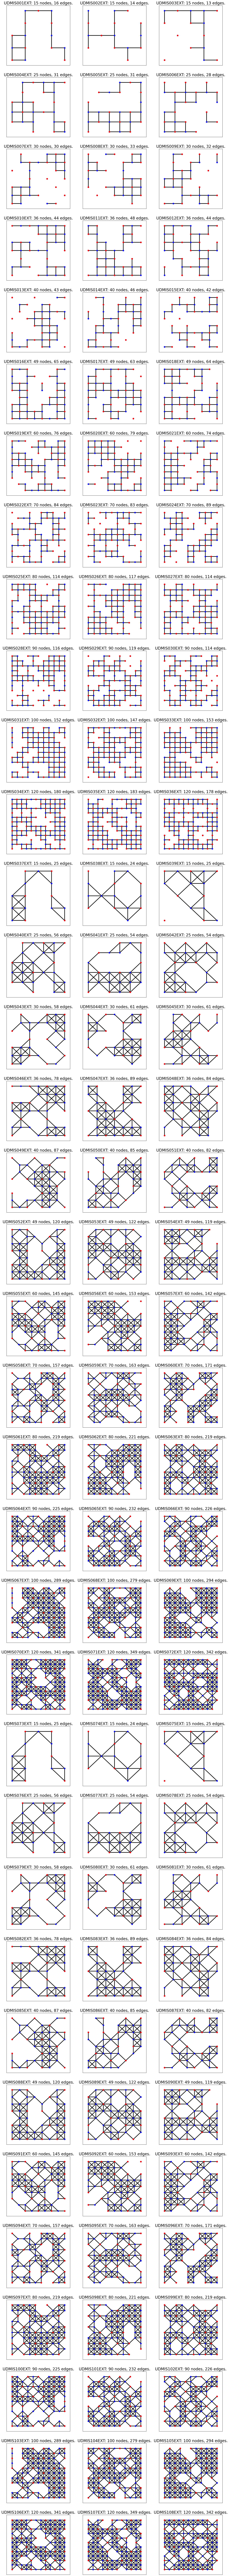

In [9]:
MIS.draw_inst_grid(files, Ncols=3)

## MWC instances

In [10]:
sel_files = [fname for fname in glob("./instances/QUBO/MWC*.json") if re.search(r'.+MWC[0-9]+.*N255E.*p0.25.*\.qubo.json', fname)]
sel_files

['./instances/QUBO/MWC232_255_N255E8092_ERG_p0.25.qubo.json',
 './instances/QUBO/MWC388_255_N255E8015_ERG_p0.25.qubo.json',
 './instances/QUBO/MWC76_255_N255E8032_ERG_p0.25.qubo.json',
 './instances/QUBO/MWC310_255_N255E8123_ERG_p0.25.qubo.json',
 './instances/QUBO/MWC154_255_N255E8124_ERG_p0.25.qubo.json']

Help on function draw_IDs_grid in module MWC_inst:

draw_IDs_grid(sel_IDs, directory='./instances-new/QUBO', Ncols=3, cross_check=False)
    Draws a grid of instances by (the number part of) IDs.
    
    Args:
        sel_IDs(list[int]): list of instance IDs (numbers)
        directory(str): directory with QUBO files (\*.qubo.json)
        Ncols(int): number of columns in the grid
    
    Returns:
        selected file names.



['./instances/QUBO/MWC2_5_N5E6_ERG_p0.5.qubo.json',
 './instances/QUBO/MWC3_5_N5E10_ERG_p0.75.qubo.json']

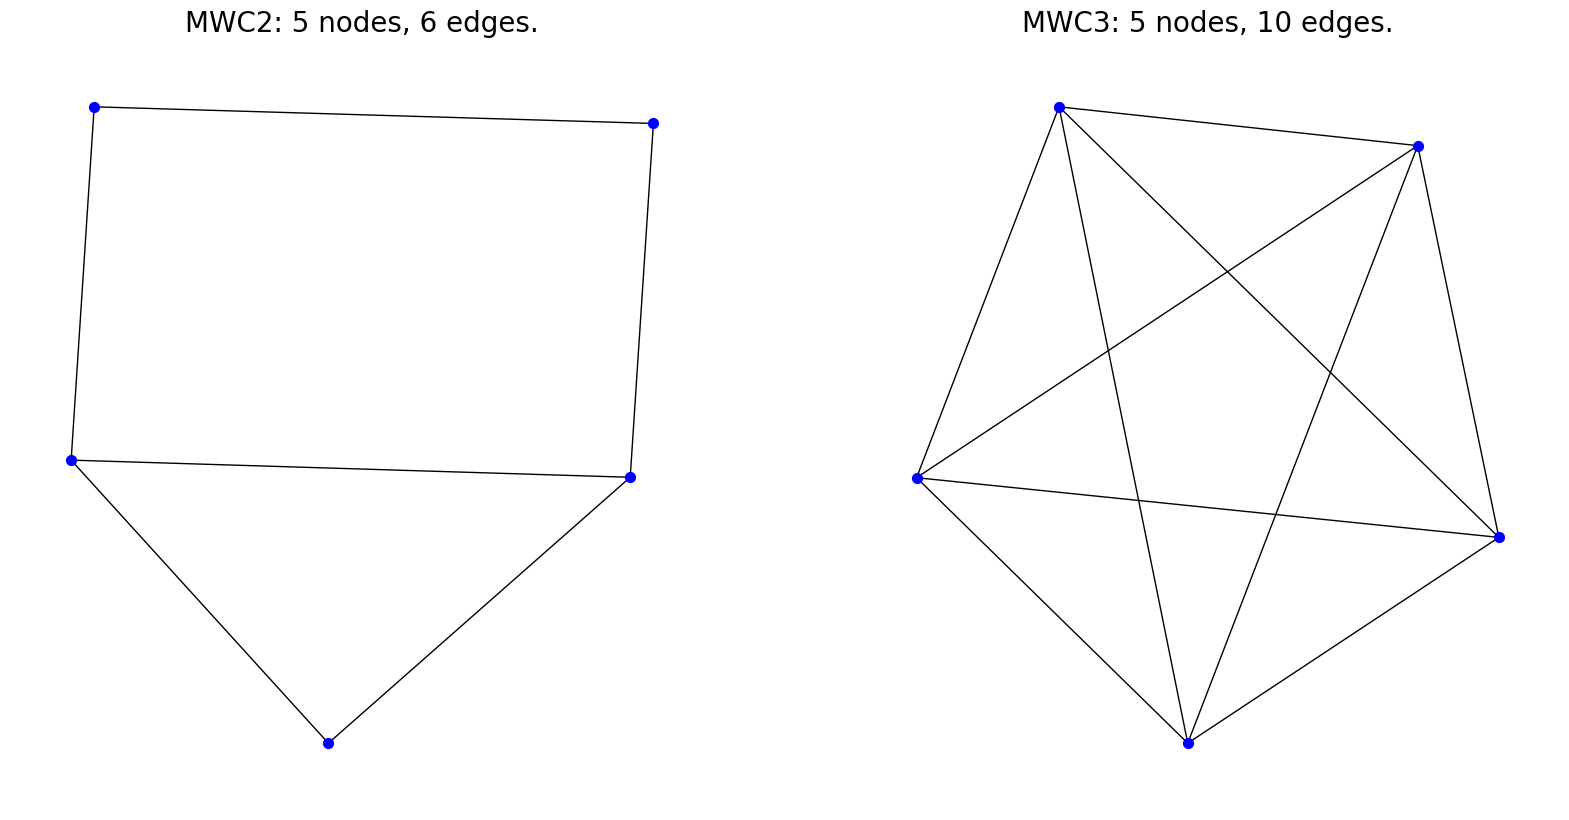

In [15]:
help(MWC.draw_IDs_grid)
MWC.draw_IDs_grid([2,3], cross_check = False, directory="./instances/QUBO")

['./instances/QUBO/MWC4_15_N15E33_ERG_p0.25.qubo.json',
 './instances/QUBO/MWC85_25_N25E78_ERG_p0.25.qubo.json',
 './instances/QUBO/MWC88_35_N35E144_ERG_p0.25.qubo.json',
 './instances/QUBO/MWC6_15_N15E79_ERG_p0.75.qubo.json',
 './instances/QUBO/MWC87_25_N25E212_ERG_p0.75.qubo.json',
 './instances/QUBO/MWC90_35_N35E422_ERG_p0.75.qubo.json']

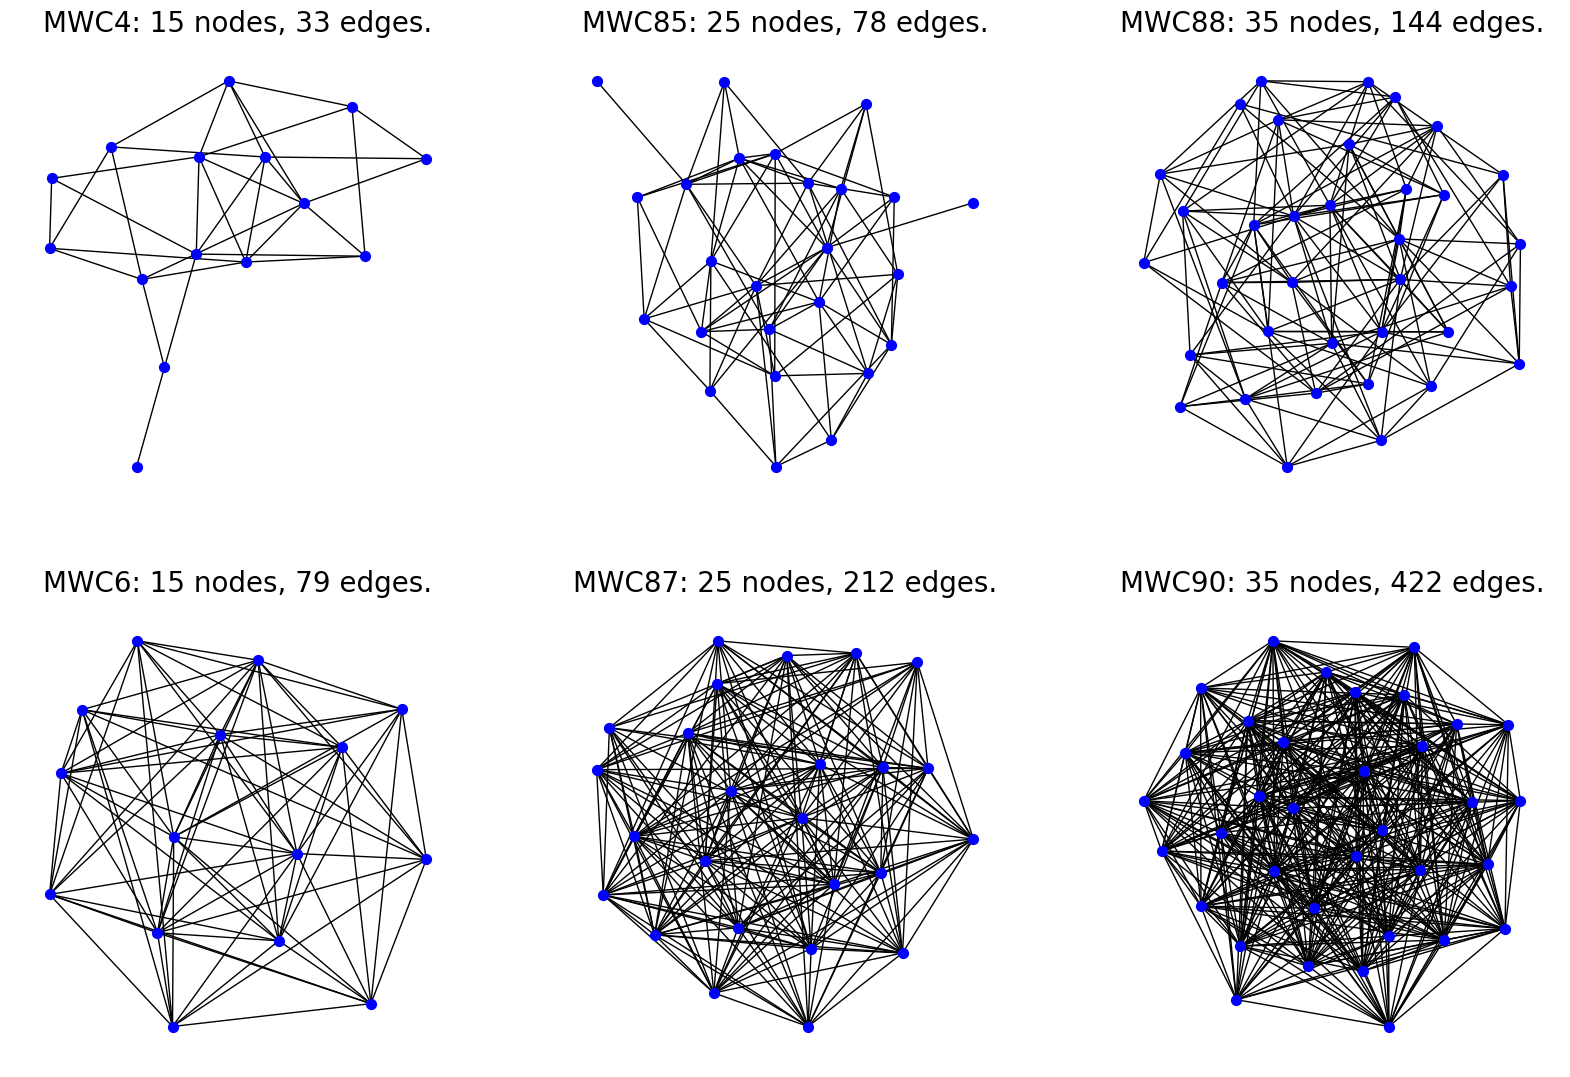

In [12]:
MWC.draw_IDs_grid([4,85, 88, 6,87, 90], cross_check = False, directory="./instances/QUBO")

## TSP instances

In [16]:
random.seed(2023)
sel_files = [fname for fname in glob("./instances/QUBO/TSP*.json") if re.search(r'.+TSP[0-9]+._256_.*\.qubo.json', fname)]
sel_files

['./instances/QUBO/TSP104_256_17_kroA100.qubo.json',
 './instances/QUBO/TSP130_256_17_pr299.qubo.json',
 './instances/QUBO/TSP195_256_17_eil101.qubo.json',
 './instances/QUBO/TSP13_256_17_pr107.qubo.json',
 './instances/QUBO/TSP52_256_17_lin105.qubo.json',
 './instances/QUBO/TSP182_256_17_rat575.qubo.json',
 './instances/QUBO/TSP169_256_17_kroC100.qubo.json',
 './instances/QUBO/TSP156_256_17_hk48.qubo.json',
 './instances/QUBO/TSP78_256_17_tsp225.qubo.json',
 './instances/QUBO/TSP65_256_17_pa561.tsp.qubo.json',
 './instances/QUBO/TSP117_256_17_brazil58.qubo.json',
 './instances/QUBO/TSP39_256_17_gr666.qubo.json',
 './instances/QUBO/TSP91_256_17_att48.qubo.json',
 './instances/QUBO/TSP26_256_17_swiss42.qubo.json',
 './instances/QUBO/TSP143_256_17_kroB100.qubo.json']

In [17]:
sel_files = random.sample(sel_files,2)
sel_files

['./instances/QUBO/TSP169_256_17_kroC100.qubo.json',
 './instances/QUBO/TSP39_256_17_gr666.qubo.json']

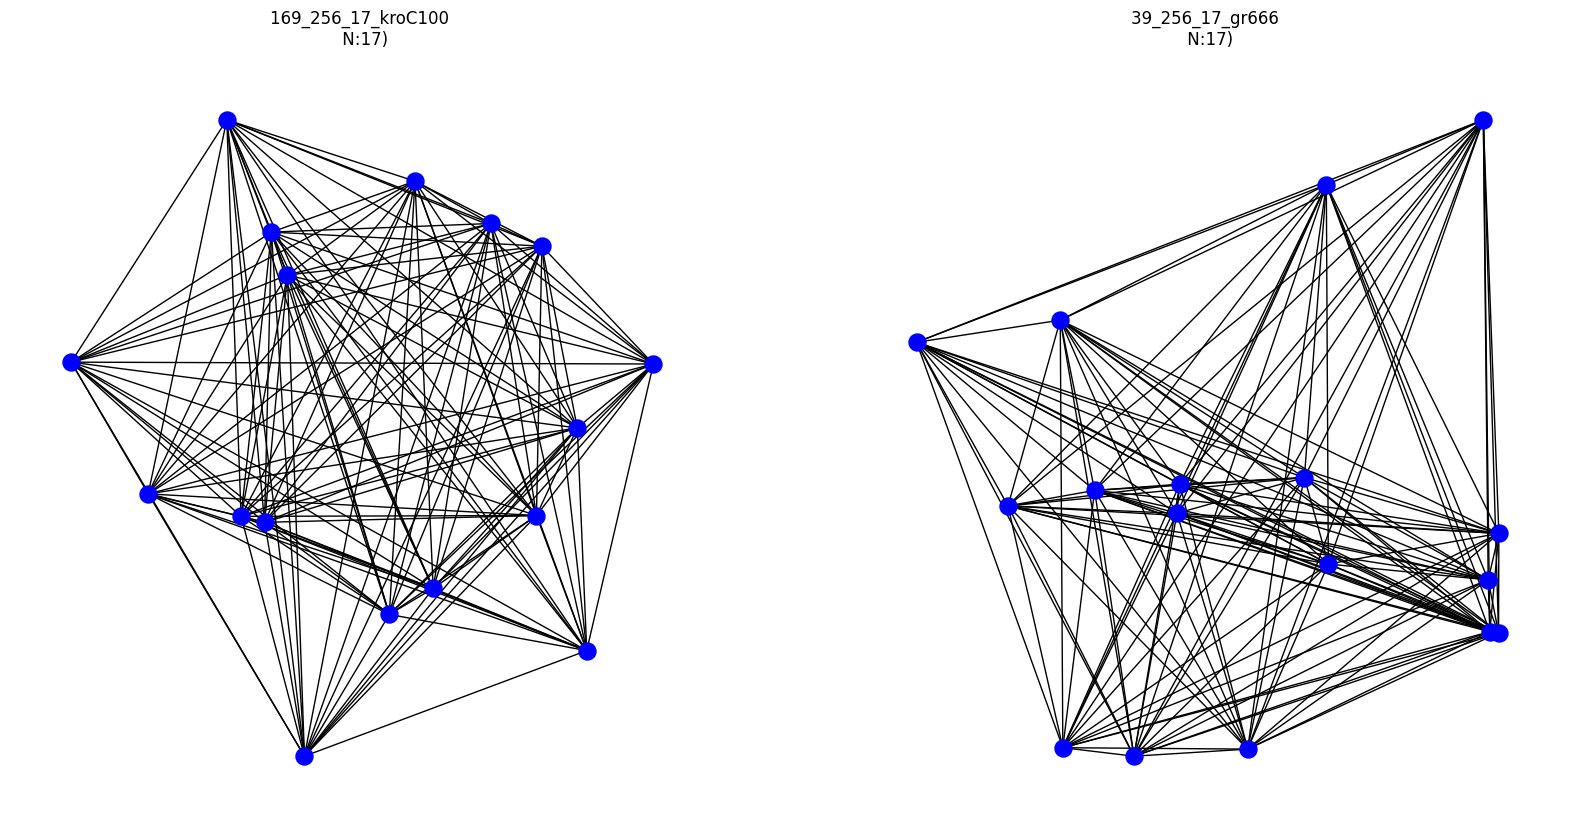

In [18]:
TSP.draw_inst_grid(sel_files, cross_check=False)

['./instances/QUBO/TSP1_16_5_pr107.qubo.json',
 './instances/QUBO/TSP2_25_6_pr107.qubo.json',
 './instances/QUBO/TSP107_36_7_brazil58.qubo.json',
 './instances/QUBO/TSP27_16_5_gr666.qubo.json',
 './instances/QUBO/TSP80_25_6_att48.qubo.json',
 './instances/QUBO/TSP146_36_7_hk48.qubo.json']

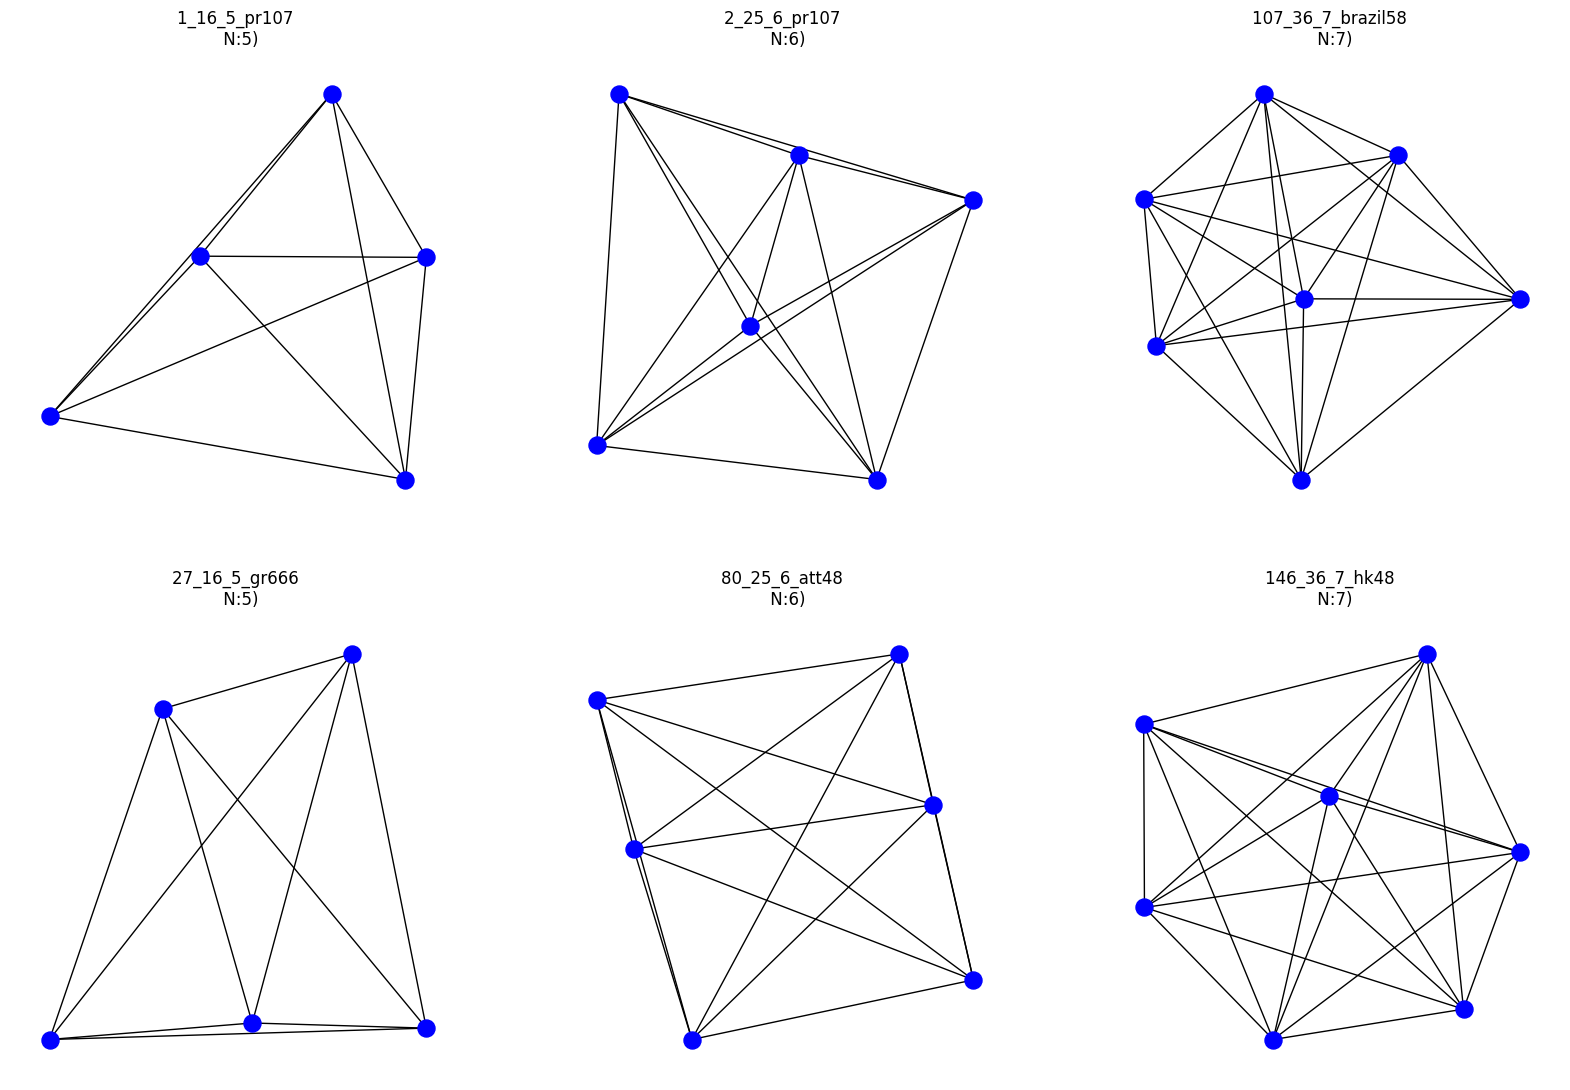

In [19]:
TSP.draw_IDs_grid([1,2,107, 27,80, 146], cross_check=False, directory="./instances/QUBO")

['./instances/QUBO/UDMIS014EXT_40_N40_W1.0_R0.2.qubo.json',
 './instances/QUBO/UDMIS7TG_30_N30_W1.0_R0.1.qubo.json']

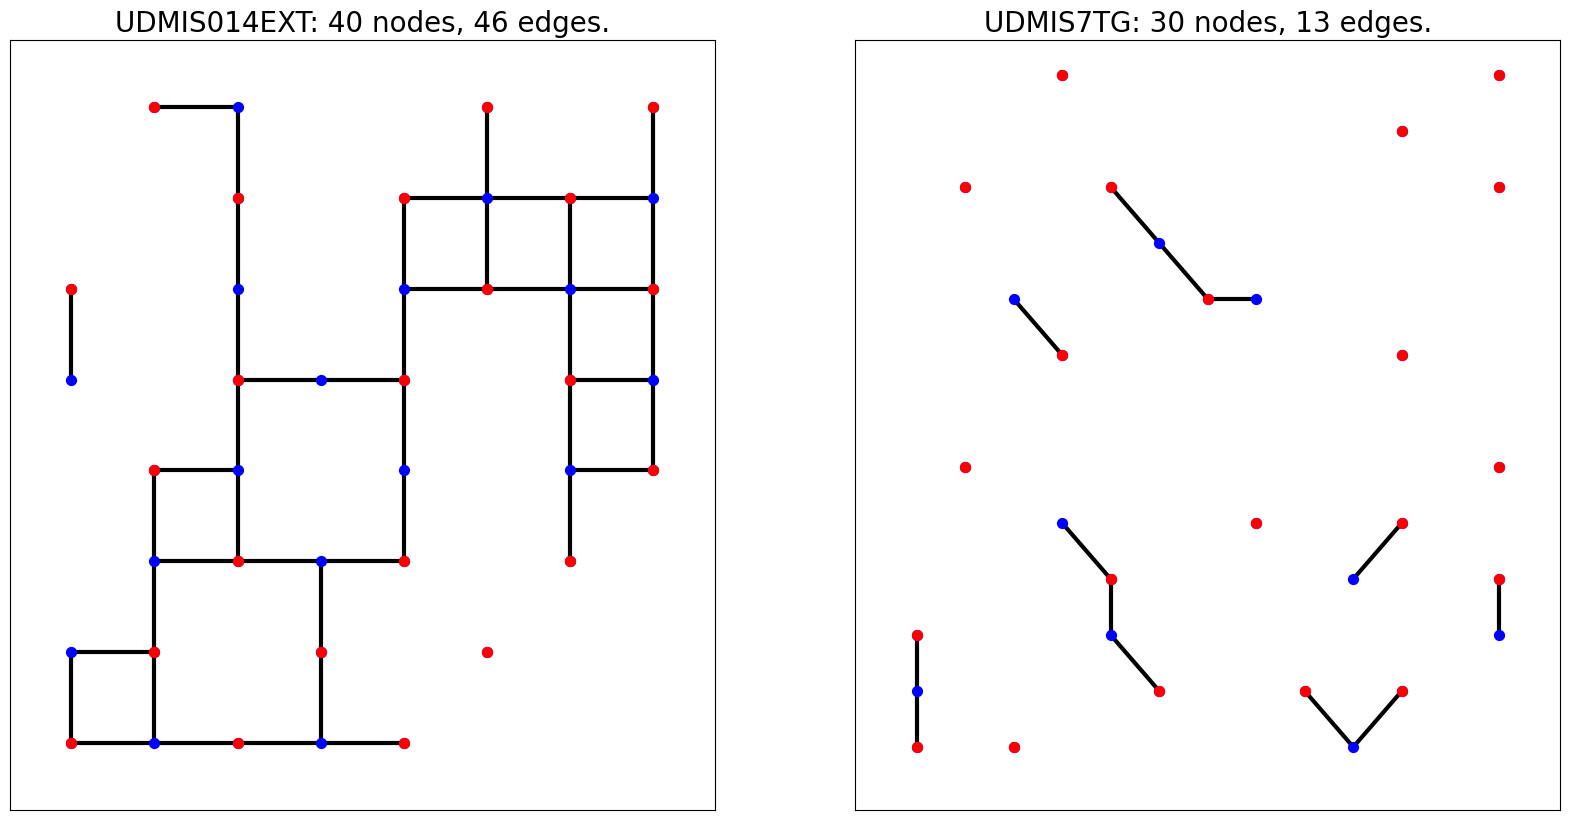

In [25]:
MIS.draw_IDs_grid(["14EXT", "7TG"], directory="./instances/QUBO")